## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  38.203469   363.527265  0.742855  2.488802  1.537471
1   7.518129   503.853721  0.225826  5.591321  1.651227
2  35.106445   967.050640  0.490884  4.068773  1.420944
3  86.183467  1140.340655  0.196978  3.140930  1.372953
4  30.487146  1383.372803  0.484737  5.197114  1.462126


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.8955341	total: 64.5ms	remaining: 1m 4s
1:	learn: 0.8877643	total: 65.6ms	remaining: 32.7s
2:	learn: 0.8786370	total: 66.6ms	remaining: 22.1s
3:	learn: 0.8687941	total: 67.7ms	remaining: 16.8s
4:	learn: 0.8596026	total: 68.4ms	remaining: 13.6s
5:	learn: 0.8511306	total: 69.2ms	remaining: 11.5s
6:	learn: 0.8422360	total: 70.2ms	remaining: 9.95s
7:	learn: 0.8330212	total: 71.1ms	remaining: 8.82s
8:	learn: 0.8249376	total: 72ms	remaining: 7.93s
9:	learn: 0.8161413	total: 73ms	remaining: 7.23s
10:	learn: 0.8092739	total: 73.6ms	remaining: 6.61s
11:	learn: 0.8010227	total: 74.1ms	remaining: 6.1s
12:	learn: 0.7942645	total: 74.8ms	remaining: 5.68s
13:	learn: 0.7869536	total: 75.4ms	remaining: 5.31s
14:	learn: 0.7785161	total: 75.9ms	remaining: 4.99s
15:	learn: 0.7708323	total: 76.5ms	remaining: 4.71s
16:	learn: 0.7634174	total: 77ms	remaining: 4.45s
17:	learn: 0.7542922	total: 77.7ms	remaining: 4.24s
18:	learn: 0.7470156	total: 78.2ms	remaining: 4.04s

42:	learn: 0.6015705	total: 91.2ms	remaining: 2.03s
43:	learn: 0.5956396	total: 92.5ms	remaining: 2.01s
44:	learn: 0.5916893	total: 93.1ms	remaining: 1.98s
45:	learn: 0.5861887	total: 93.6ms	remaining: 1.94s
46:	learn: 0.5803144	total: 94.1ms	remaining: 1.91s
47:	learn: 0.5750464	total: 94.6ms	remaining: 1.88s
48:	learn: 0.5699026	total: 95.1ms	remaining: 1.85s
49:	learn: 0.5650507	total: 95.6ms	remaining: 1.82s
50:	learn: 0.5601284	total: 96.1ms	remaining: 1.79s
51:	learn: 0.5560858	total: 96.7ms	remaining: 1.76s
52:	learn: 0.5505189	total: 97.2ms	remaining: 1.74s
53:	learn: 0.5461287	total: 97.7ms	remaining: 1.71s
54:	learn: 0.5419500	total: 98.1ms	remaining: 1.69s
55:	learn: 0.5380498	total: 98.7ms	remaining: 1.66s
56:	learn: 0.5327350	total: 99ms	remaining: 1.64s
57:	learn: 0.5280284	total: 99.5ms	remaining: 1.61s
58:	learn: 0.5237379	total: 99.9ms	remaining: 1.59s
59:	learn: 0.5197789	total: 101ms	remaining: 1.57s
60:	learn: 0.5162329	total: 101ms	remaining: 1.56s
61:	learn: 0.511

197:	learn: 0.2481822	total: 160ms	remaining: 647ms
198:	learn: 0.2474981	total: 160ms	remaining: 645ms
199:	learn: 0.2470970	total: 161ms	remaining: 643ms
200:	learn: 0.2458186	total: 161ms	remaining: 640ms
201:	learn: 0.2447256	total: 162ms	remaining: 638ms
202:	learn: 0.2440145	total: 162ms	remaining: 636ms
203:	learn: 0.2427235	total: 162ms	remaining: 634ms
204:	learn: 0.2421504	total: 163ms	remaining: 632ms
205:	learn: 0.2414392	total: 163ms	remaining: 629ms
206:	learn: 0.2405825	total: 164ms	remaining: 627ms
207:	learn: 0.2394994	total: 164ms	remaining: 625ms
208:	learn: 0.2385568	total: 165ms	remaining: 623ms
209:	learn: 0.2379307	total: 165ms	remaining: 621ms
210:	learn: 0.2368664	total: 165ms	remaining: 619ms
211:	learn: 0.2359685	total: 166ms	remaining: 616ms
212:	learn: 0.2349694	total: 166ms	remaining: 614ms
213:	learn: 0.2344344	total: 167ms	remaining: 612ms
214:	learn: 0.2339186	total: 167ms	remaining: 610ms
215:	learn: 0.2333158	total: 167ms	remaining: 608ms
216:	learn: 

395:	learn: 0.1273094	total: 240ms	remaining: 367ms
396:	learn: 0.1270018	total: 241ms	remaining: 366ms
397:	learn: 0.1266993	total: 241ms	remaining: 365ms
398:	learn: 0.1261513	total: 242ms	remaining: 364ms
399:	learn: 0.1260264	total: 242ms	remaining: 363ms
400:	learn: 0.1257291	total: 243ms	remaining: 362ms
401:	learn: 0.1252112	total: 243ms	remaining: 362ms
402:	learn: 0.1250901	total: 243ms	remaining: 361ms
403:	learn: 0.1249711	total: 244ms	remaining: 360ms
404:	learn: 0.1244585	total: 244ms	remaining: 359ms
405:	learn: 0.1243427	total: 245ms	remaining: 358ms
406:	learn: 0.1240979	total: 245ms	remaining: 357ms
407:	learn: 0.1235905	total: 245ms	remaining: 356ms
408:	learn: 0.1232979	total: 246ms	remaining: 355ms
409:	learn: 0.1231864	total: 246ms	remaining: 354ms
410:	learn: 0.1226813	total: 247ms	remaining: 354ms
411:	learn: 0.1223942	total: 247ms	remaining: 353ms
412:	learn: 0.1221584	total: 248ms	remaining: 352ms
413:	learn: 0.1216728	total: 248ms	remaining: 351ms
414:	learn: 

581:	learn: 0.0812498	total: 319ms	remaining: 229ms
582:	learn: 0.0809496	total: 320ms	remaining: 229ms
583:	learn: 0.0805765	total: 320ms	remaining: 228ms
584:	learn: 0.0802278	total: 321ms	remaining: 227ms
585:	learn: 0.0799214	total: 321ms	remaining: 227ms
586:	learn: 0.0795661	total: 321ms	remaining: 226ms
587:	learn: 0.0791775	total: 322ms	remaining: 225ms
588:	learn: 0.0789660	total: 322ms	remaining: 225ms
589:	learn: 0.0787600	total: 323ms	remaining: 224ms
590:	learn: 0.0785057	total: 323ms	remaining: 224ms
591:	learn: 0.0782127	total: 323ms	remaining: 223ms
592:	learn: 0.0779537	total: 324ms	remaining: 222ms
593:	learn: 0.0775769	total: 324ms	remaining: 222ms
594:	learn: 0.0773251	total: 325ms	remaining: 221ms
595:	learn: 0.0770793	total: 325ms	remaining: 220ms
596:	learn: 0.0768501	total: 325ms	remaining: 220ms
597:	learn: 0.0764827	total: 326ms	remaining: 219ms
598:	learn: 0.0762622	total: 326ms	remaining: 218ms
599:	learn: 0.0760466	total: 326ms	remaining: 218ms
600:	learn: 

791:	learn: 0.0485992	total: 403ms	remaining: 106ms
792:	learn: 0.0484796	total: 404ms	remaining: 106ms
793:	learn: 0.0484154	total: 405ms	remaining: 105ms
794:	learn: 0.0483959	total: 405ms	remaining: 105ms
795:	learn: 0.0483396	total: 406ms	remaining: 104ms
796:	learn: 0.0483067	total: 406ms	remaining: 104ms
797:	learn: 0.0482439	total: 407ms	remaining: 103ms
798:	learn: 0.0481039	total: 407ms	remaining: 102ms
799:	learn: 0.0480846	total: 408ms	remaining: 102ms
800:	learn: 0.0480523	total: 408ms	remaining: 101ms
801:	learn: 0.0480002	total: 408ms	remaining: 101ms
802:	learn: 0.0477794	total: 409ms	remaining: 100ms
803:	learn: 0.0476432	total: 409ms	remaining: 99.8ms
804:	learn: 0.0475094	total: 410ms	remaining: 99.2ms
805:	learn: 0.0474414	total: 410ms	remaining: 98.7ms
806:	learn: 0.0473929	total: 410ms	remaining: 98.2ms
807:	learn: 0.0473451	total: 411ms	remaining: 97.6ms
808:	learn: 0.0473261	total: 411ms	remaining: 97.1ms
809:	learn: 0.0472481	total: 412ms	remaining: 96.5ms
810:	

978:	learn: 0.0332092	total: 480ms	remaining: 10.3ms
979:	learn: 0.0330622	total: 482ms	remaining: 9.83ms
980:	learn: 0.0329782	total: 482ms	remaining: 9.34ms
981:	learn: 0.0328854	total: 483ms	remaining: 8.85ms
982:	learn: 0.0328347	total: 483ms	remaining: 8.35ms
983:	learn: 0.0326956	total: 483ms	remaining: 7.86ms
984:	learn: 0.0326471	total: 484ms	remaining: 7.37ms
985:	learn: 0.0325765	total: 484ms	remaining: 6.88ms
986:	learn: 0.0324400	total: 485ms	remaining: 6.38ms
987:	learn: 0.0323707	total: 485ms	remaining: 5.89ms
988:	learn: 0.0323210	total: 486ms	remaining: 5.4ms
989:	learn: 0.0322737	total: 486ms	remaining: 4.91ms
990:	learn: 0.0321401	total: 487ms	remaining: 4.42ms
991:	learn: 0.0320680	total: 487ms	remaining: 3.93ms
992:	learn: 0.0320065	total: 487ms	remaining: 3.44ms
993:	learn: 0.0319621	total: 488ms	remaining: 2.94ms
994:	learn: 0.0318662	total: 488ms	remaining: 2.45ms
995:	learn: 0.0318172	total: 489ms	remaining: 1.96ms
996:	learn: 0.0317953	total: 489ms	remaining: 1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5004341187313367


ABC Pre-generator MAE 0.500874700016261


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

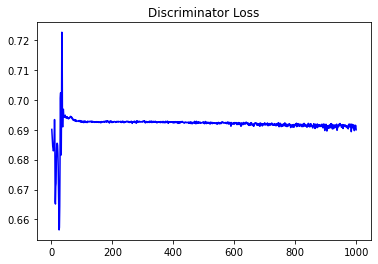

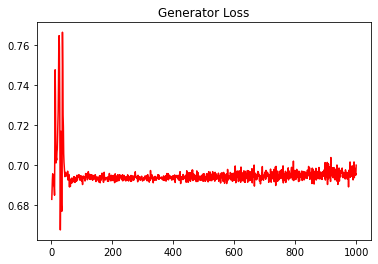

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.5150895803831518


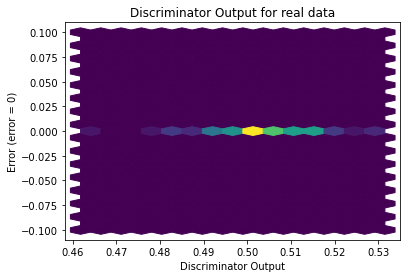

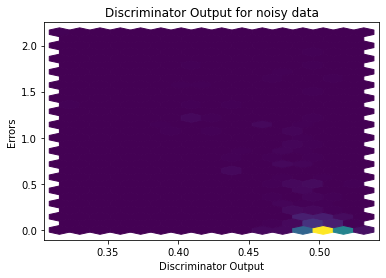

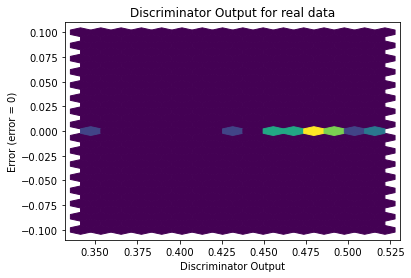

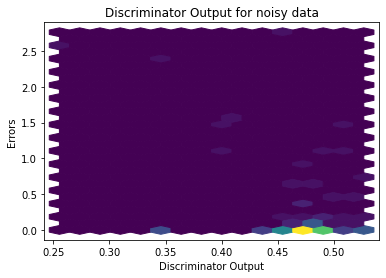

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

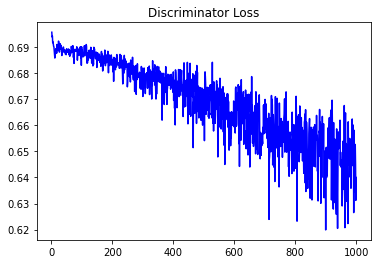

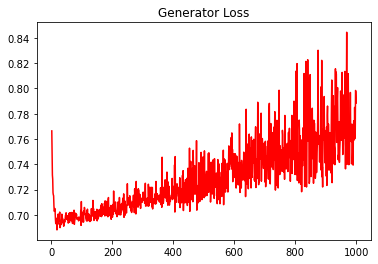

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5397467724662274


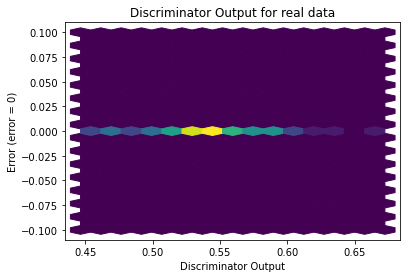

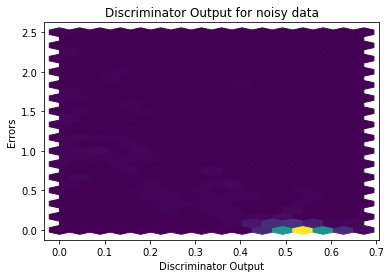

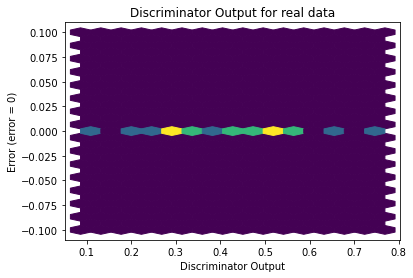

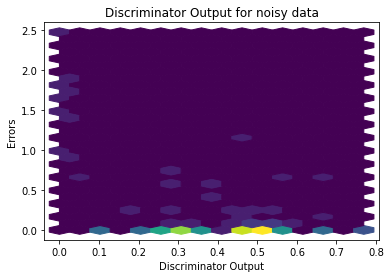

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


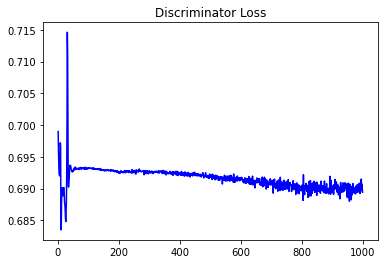

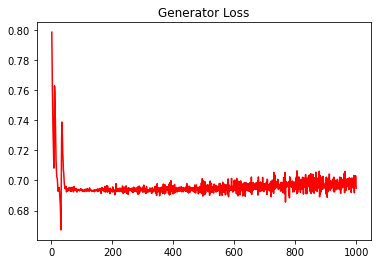

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4522191940844059


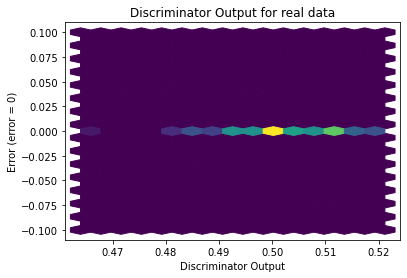

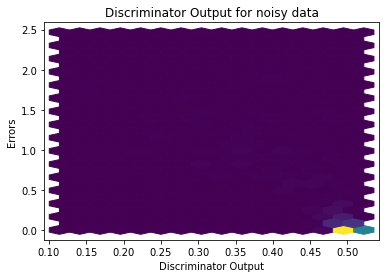

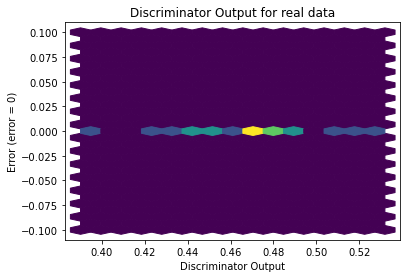

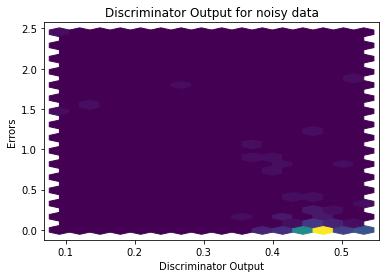

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


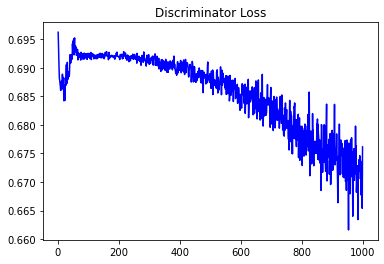

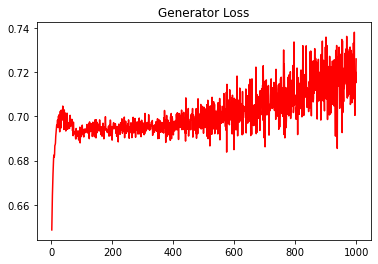

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.488152164392639


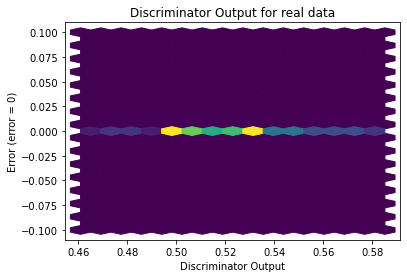

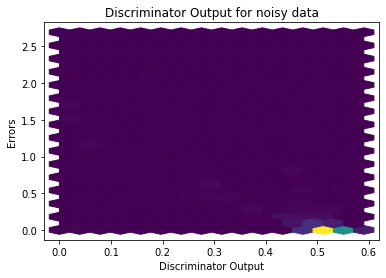

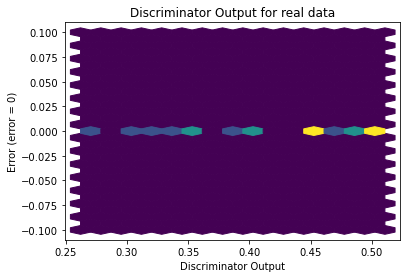

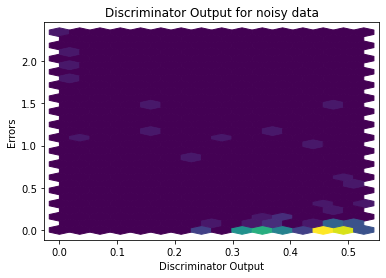

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4634]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0634]], requires_grad=True)
